<center>
<h1> Decision Tree
</center>

###### Definition of Target and Outcome Window:
One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)


###### Data Pre-Processing - 
    - Missing Values Treatment - Numerical (Mean/Median imputa
###### Data Exploratory Analysis
    - using pandas profiling
###### Model Build and Model Diagnostics
    - Train and Test split
    - Hyperparameter tuning using Grid Search CV
    - Classification Table Analysis fro train data - Accuracy
###### Model Validation
    - Classification Table Analysis for test data - Accuracy
###### Model Interpretation for its properties
    - Inferencing for finding the most important contributors
    - Prediction of risk and proactive prevention by targeting segments of the population

In [56]:
# Decision Trees
import sklearn.tree as dt
import sklearn.ensemble as en
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import tree as t
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()


<Figure size 720x540 with 0 Axes>

In [27]:
dir(dt)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [28]:
bankloans = pd.read_csv( 'bankloans.csv' )

In [29]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [30]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(bankloans)

In [31]:
features = bankloans.columns.difference(['default'])
features

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( bankloans[features],
                                                  bankloans['default'],
                                                  test_size = 0.3,
                                                  random_state = 142 )

In [33]:
#Fine Tuning the parameters
param_grid = {'max_depth': np.arange(3, 8), 'max_features': np.arange(3,5)}

In [34]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([3, 4])})

In [35]:
tree.best_params_

{'max_depth': 3, 'max_features': 4}

In [36]:
tree.best_score_

0.7795918367346939

In [37]:
#Building Final Decision Tree Model
train_X.head()

address  age  creddebt  debtinc  ed  employ  income   othdebt
673        5   35  1.369962     11.1   1       0      34  2.404038
342       19   39  0.421792      4.9   2      15      32  1.146208
182       21   45  0.912000      3.0   3      16      80  1.488000
668       14   35  0.264306      4.9   1       7      29  1.156694
611       23   46  1.617084     13.8   1       9      31  2.660916

In [38]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=3 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=3, max_features=3)

In [39]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [40]:
tree_test_pred.sample( n = 10 )

actual  predicted
576       1          0
395       0          0
77        0          0
361       0          0
67        0          0
561       0          0
601       0          0
88        0          0
10        0          0
603       0          0

In [41]:
#Accuracy on test data
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7619047619047619

C:\Users\smirn\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 46.5, 'Predicted label')

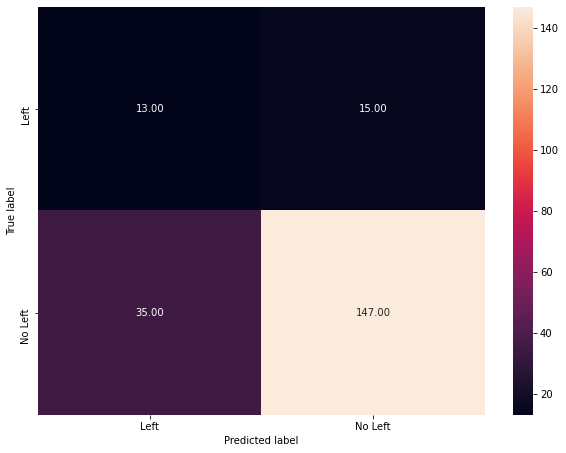

In [42]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
clf_tree.feature_importances_

array([0.03392864, 0.09465537, 0.05593561, 0.57781292, 0.        ,
       0.18035886, 0.05730861, 0.        ])

In [44]:
feature_importance=pd.DataFrame(clf_tree.feature_importances_,index=train_X.columns).sort_values(0, ascending=False)

In [45]:
# importance of each feature in Decision Trees
feature_importance

0
debtinc   0.577813
employ    0.180359
age       0.094655
income    0.057309
creddebt  0.055936
address   0.033929
ed        0.000000
othdebt   0.000000

In [46]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['debtinc', 'employ', 'age', 'income', 'creddebt', 'address']

<AxesSubplot:>

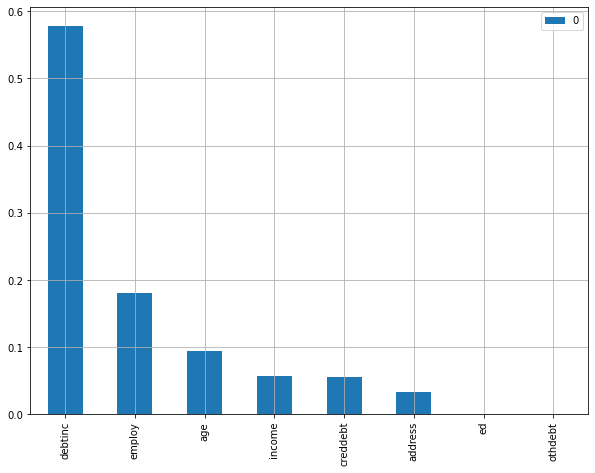

In [47]:
feature_importance.head(10).plot(kind='bar')

In [48]:
#Generate Rules from Decision Trees
print(t.export_text(clf_tree))

|--- feature_3 <= 12.35
|   |--- feature_5 <= 3.50
|   |   |--- feature_1 <= 32.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  32.50
|   |   |   |--- class: 0
|   |--- feature_5 >  3.50
|   |   |--- feature_2 <= 10.33
|   |   |   |--- class: 0
|   |   |--- feature_2 >  10.33
|   |   |   |--- class: 1
|--- feature_3 >  12.35
|   |--- feature_6 <= 25.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- class: 1
|   |--- feature_6 >  25.50
|   |   |--- feature_3 <= 24.65
|   |   |   |--- class: 0
|   |   |--- feature_3 >  24.65
|   |   |   |--- class: 1



[Text(697.5, 951.3000000000001, 'debtinc <= 12.35\ngini = 0.399\nsamples = 490\nvalue = [355, 135]\nclass = nor default'),
 Text(348.75, 679.5, 'employ <= 3.5\ngini = 0.267\nsamples = 334\nvalue = [281, 53]\nclass = nor default'),
 Text(174.375, 407.70000000000005, 'age <= 32.5\ngini = 0.464\nsamples = 93\nvalue = [59, 34]\nclass = nor default'),
 Text(87.1875, 135.89999999999998, 'gini = 0.5\nsamples = 64\nvalue = [33, 31]\nclass = nor default'),
 Text(261.5625, 135.89999999999998, 'gini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = nor default'),
 Text(523.125, 407.70000000000005, 'creddebt <= 10.334\ngini = 0.145\nsamples = 241\nvalue = [222, 19]\nclass = nor default'),
 Text(435.9375, 135.89999999999998, 'gini = 0.132\nsamples = 239\nvalue = [222, 17]\nclass = nor default'),
 Text(610.3125, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Default'),
 Text(1046.25, 679.5, 'income <= 25.5\ngini = 0.499\nsamples = 156\nvalue = [74, 82]\nclass = Default'),
 Text(

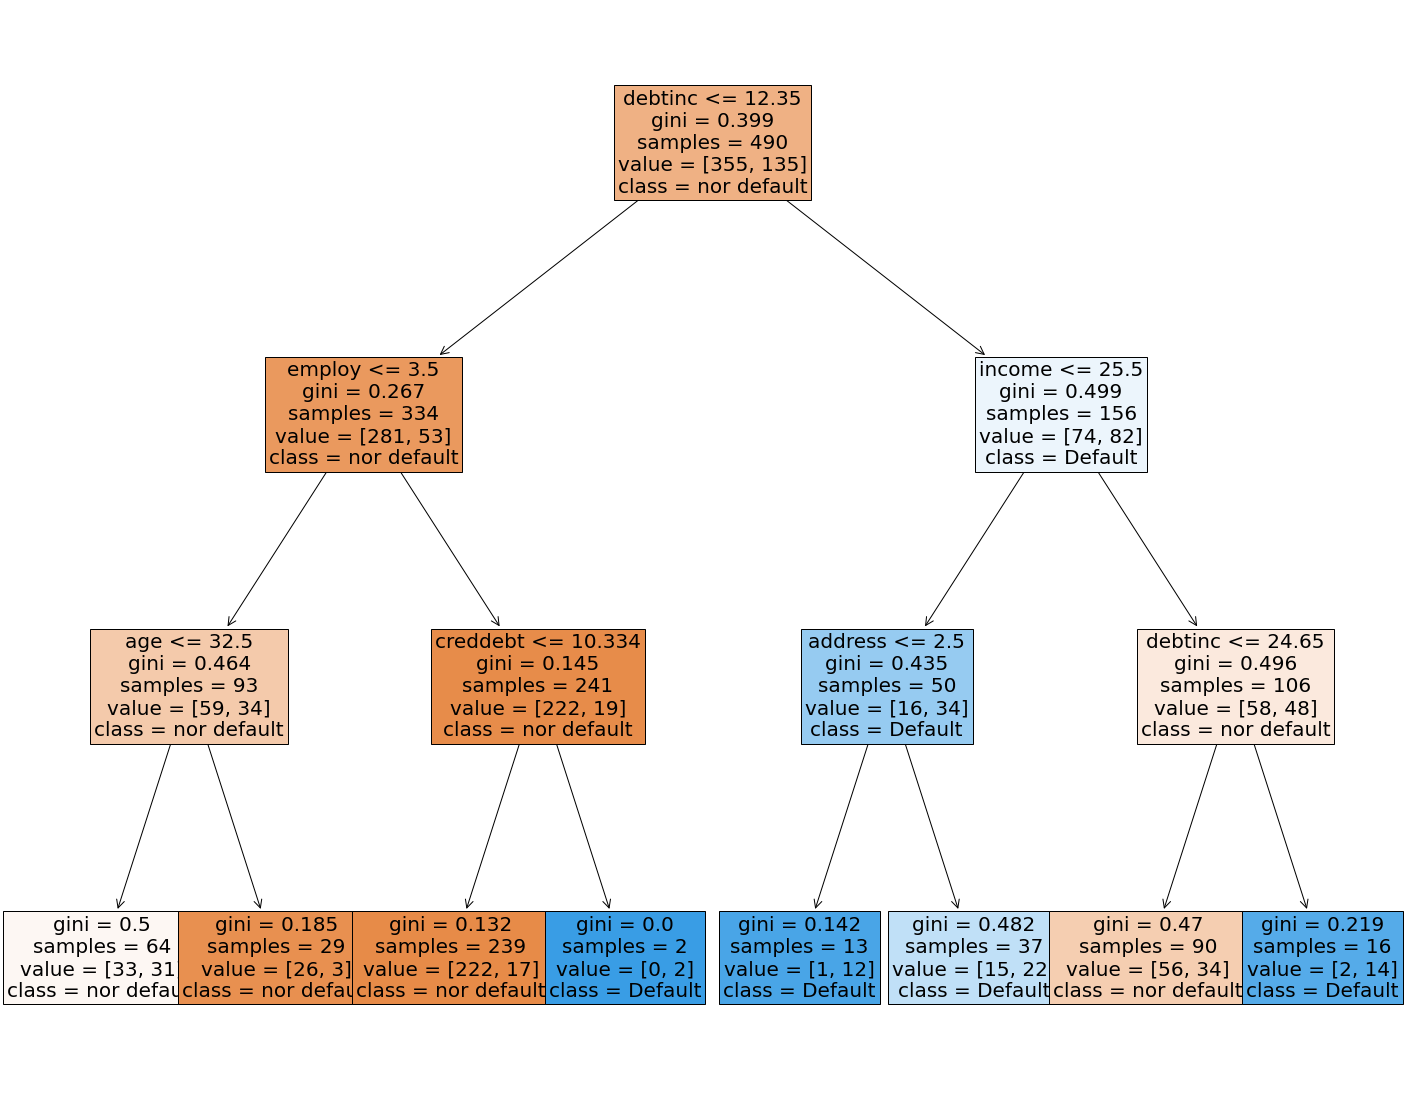

In [57]:
fig = plt.figure(figsize=(25,20))
t.plot_tree(clf_tree, feature_names=train_X.columns, class_names= {0:"nor default",1:"Default"},filled=True,fontsize=20)